<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 05 - Gráficos com Python**

## ➥ Principais Bibliotecas
---

As principais bibliotecas Python para plotagem de gráficos são:

- **Matplotlib:** É possivelmente a biblioteca mais utilizada para criar visualizações estáticas, interativas e animadas em Python. Sua sintaxe pode ser um pouco mais complicada/prolixa (em relação às demais) e sua aparência (por padrão) é mais simplista. 

- **Seaborn:** Uma biblioteca construída sobre o Matplotlib que fornece uma interface de alto nível para criar gráficos mais atraentes.

- **Plotly:** Uma biblioteca que permite visualizações interativas e dinâmicas, incluindo gráficos 3D, mapas e animações. É muito utilizada em páginas da web por conta de sua interatividade e aparência moderna. Sua sintaxe pode ser um pouco prolixa para determinadas tarefas.


## ➥ Exemplos
---

Seguem alguns exemplos de uso das bibliotecas Python para plotagem de gráficos:
    
### 📈 Gráficos de funções

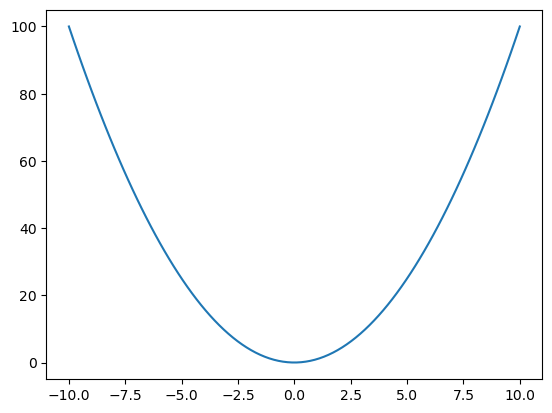

In [1]:
import numpy as np 

# forma mais comum de importar a biblioteca matplotlib
import matplotlib.pyplot as plt

# precisamos definir nossa função antes de traçar o gráfico dela
def f(x):
    return x*x

# precisamos dizer qual o domínio (valores de x) que queremos utilizar 
x = np.linspace(-10, 10, 100)

# prepara o plot
plt.plot(x, f(x))

# mostra o gráfico
plt.show()


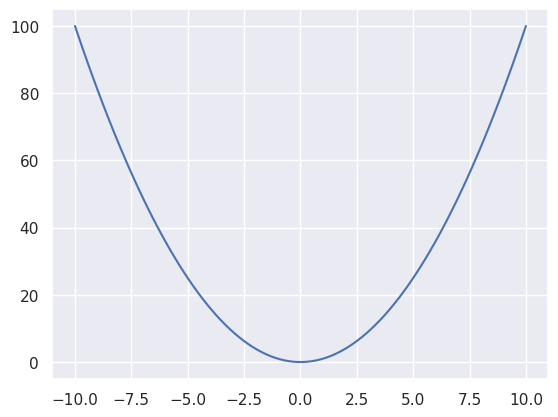

In [2]:
# forma usual de importar a biblioteca seaborn
import seaborn as sns

# configuração visual padrão 
sns.set()

# prepara o plot
sns.lineplot(x=x, y=f(x))

# mostra o gráfico
plt.show()

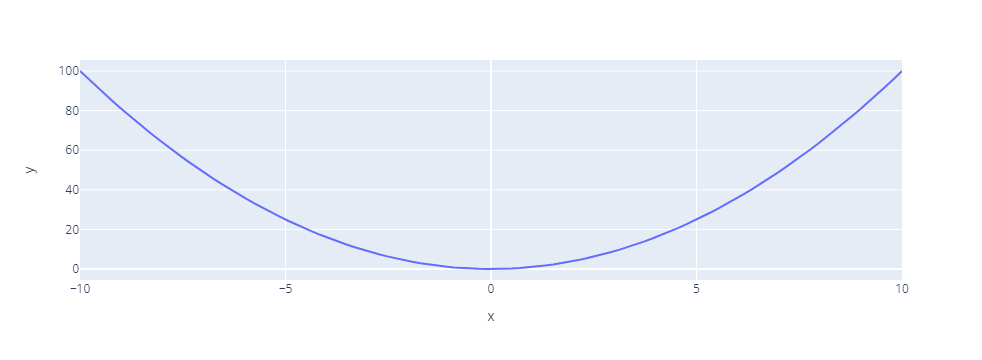

In [3]:
# por simplicidade, geralmente é melhor uitlizar a biblioteca plotly.express 
import plotly.express as px

fig = px.line(x=x, y=f(x))
fig.show()

### 📈 Gráficos de dados/pontos

In [4]:
# dados de exemplo
x = np.linspace(0, 10, 100, endpoint=False)
y = np.exp(-x)

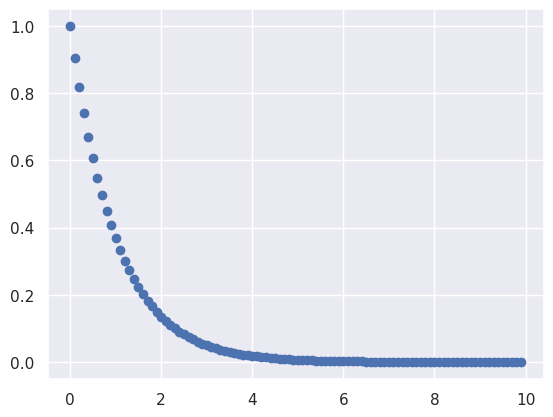

In [5]:
# a opção acima permite criar interatividade (dar zoom, baixar...)
plt.plot(x, y, 'bo')
plt.show()

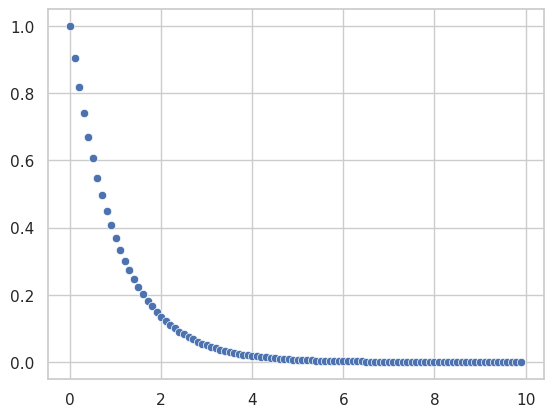

In [6]:
sns.set(context="notebook", style="whitegrid")
sns.scatterplot(x=x, y=y)

# mostra o gráfico
plt.show()

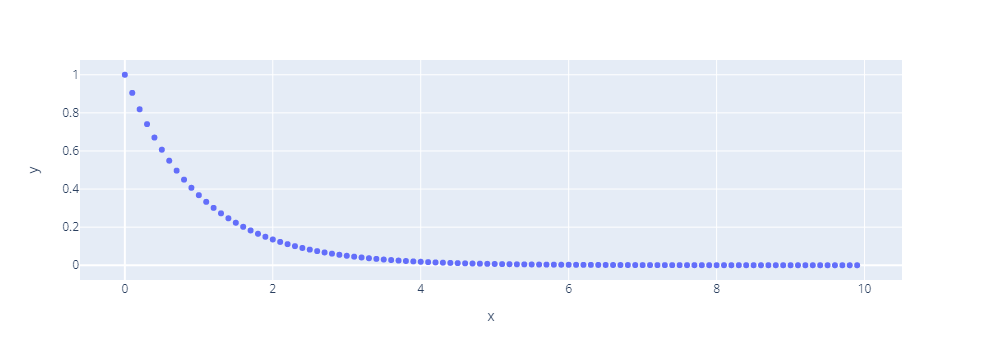

In [7]:
fig = px.scatter(x=x, y=y)
fig.show()

### 📊 Gráficos de barra

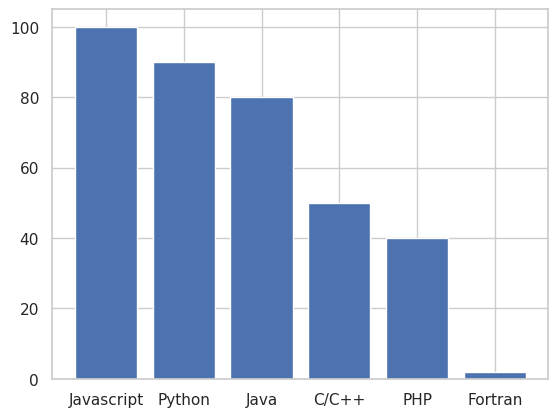

In [8]:
langs = ['Javascript', 'Python', 'Java', 'C/C++', 'PHP', 'Fortran']
usage = [100,90,80,50,40,2]
plt.bar(langs, usage)
plt.show()

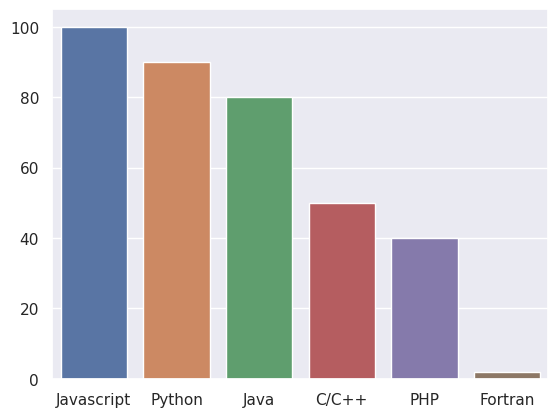

In [9]:
sns.set(context="notebook", style="darkgrid")
sns.barplot(x=langs, y=usage)
plt.show()

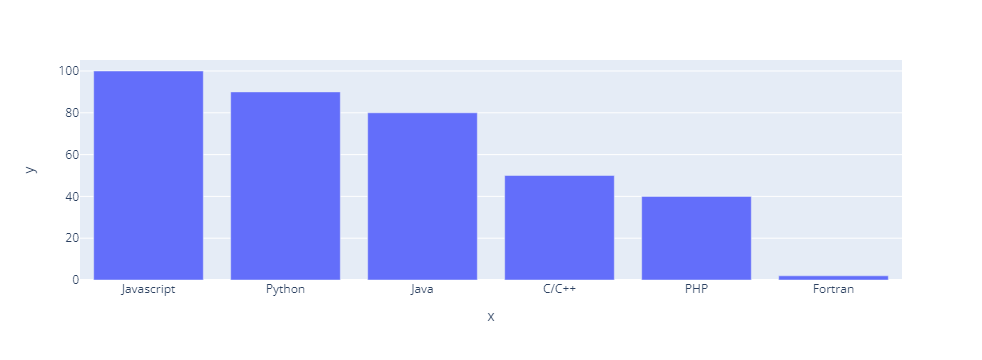

In [10]:
fig = px.bar(x=langs, y=usage)
fig.show()

### 📝 Gráficos a partir de um arquivo

É possível traçar gráficos a partir de um arquivo. Um método bastante usual e muito eficiente é usar a função `read_csv` da biblioteca Pandas ou `loadtxt` do NumPy. Vejamos alguns exemplos abaixo, mas primeiro vamos criar nosso arquivo de dados contendo duas "funções":

In [11]:
%%writefile dados.txt 
0  0   0
1  1   1
2  4   8
3  9  27
4 16  64
5 25 125
6 36 216
7 49 343

Overwriting dados.txt


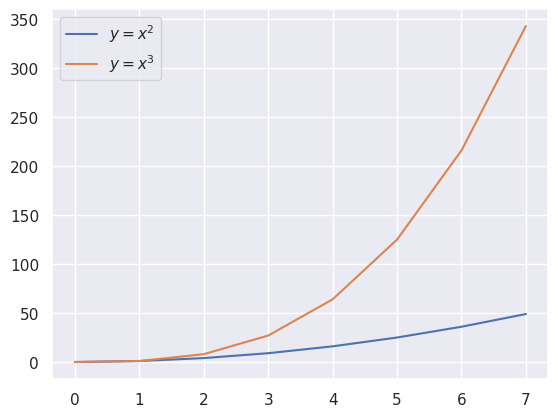

In [12]:
x, y1, y2 = np.loadtxt('dados.txt', unpack=True)
fig, ax = plt.subplots()
sns.lineplot(x=x, y=y1, label='$y=x^2$')
sns.lineplot(x=x, y=y2, label='$y=x^3$')
plt.show(fig)

## ➥ Aplicações: Gráficos de Queda Livre
---

Considere a seguinte classe para um objeto em queda livre:

In [13]:
class QuedaLivre:
    """
    Classe para simular o movimento de um objeto em queda livre próximo à superfície da Terra.
    Assume um referencial inercial no solo com o eixo vertical apontando pra cima.
    """
    def __init__(self, s0=0, v0=0, t0=0, g=-10):
        self.s0 = float(s0)
        self.v0 = float(v0)
        self.t0 = float(t0)
        self.g = float(g)

    def posicao(self, t):
        """Método para calcular a posição do objeto em queda livre no instante t fornecido."""
        t = float(t)
        if t <= self.t0:
            return self.s0
        return self.s0 + self.v0*(t - self.t0) + 0.5*self.g*(t - self.t0)**2

    def velocidade(self, t):
        """Método para calcular a velocidade do objeto em queda livre no instante t."""
        t = float(t)
        if t <= self.t0:
            return self.v0
        return self.v0 + self.g*(t - self.t0)

Vamos criar dois objetos partindo de alturas diferentes e tempos diferentes:

In [14]:
p1 = QuedaLivre(s0=150)            # inicia o mov. imediatamente de uma altura de 150m
p2 = QuedaLivre(120, t0=2, v0=-5)  # inicia o mov. após 1s de uma altura de 120m, com vel. inicial de 5m/s

In [15]:
# prepara os dados dos gráficos para traçar
t = np.arange(0, 10+1, 0.01)
pos1 = [p1.posicao(x) for x in t]
pos2 = [p2.posicao(x) for x in t]

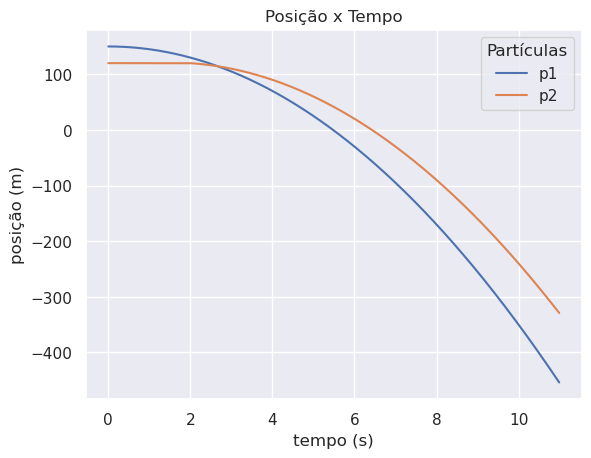

In [16]:
# vamos traçar o gráfico da posição para ambas partículas
fig, ax = plt.subplots()
sns.lineplot(x=t, y=pos1, label='p1')
sns.lineplot(x=t, y=pos2, label='p2')
ax.set(xlabel ="tempo (s)", ylabel = "posição (m)", title = "Posição x Tempo")
ax.legend(title='Partículas')
plt.show(fig)

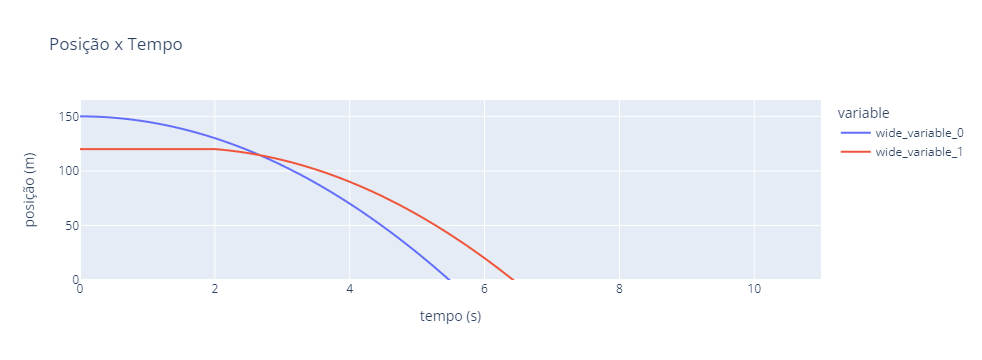

In [17]:
fig = px.line(x=t, y=[pos1, pos2], labels={'x':'tempo (s)', 'value':'posição (m)'}, title = "Posição x Tempo")

# restringindo o eixo y ao solo
fig.update_layout(yaxis_range=[0, 1.1*max(pos1)])

fig.show()

<div class="alert alert-block alert-warning">
💡<b>PERGUNTA:</b> Como faríamos para determinar com alta precisão a posição do encontro entre essas duas partículas? Cenas da próxima aula...
</div>

## ➥ Gráficos complexos e animações
---

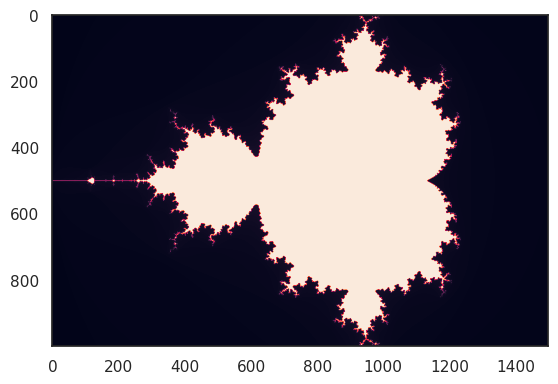

In [18]:
# um fractal: conjunto de Mandelbrot
from timeit import default_timer as timer
try:
    from matplotlib.pylab import imshow, show
    have_mpl = True
except ImportError:
    have_mpl = False
import numpy as np
from numba import jit

@jit(nopython=True)
def mandelbrot(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255

@jit(nopython=True)
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandelbrot(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
if have_mpl:
    sns.set(context="notebook", style="white")
    imshow(image)
    show()

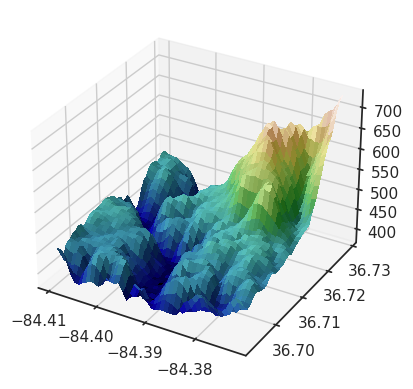

In [19]:
# plot 3D interativo 
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# função de inicialização: plota o fundo de cada quadro
def init():
    line.set_data([], [])
    return (line,)

# função de animação 
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
plt.close()
HTML(anim.to_html5_video())